In [1]:
!pip install keras-cv keras-core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 43.1 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

In [6]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc",
    bounding_box_format = "xywh"
)

100%|██████████| 136M/136M [00:04<00:00, 31.6MB/s]


5586/5586 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


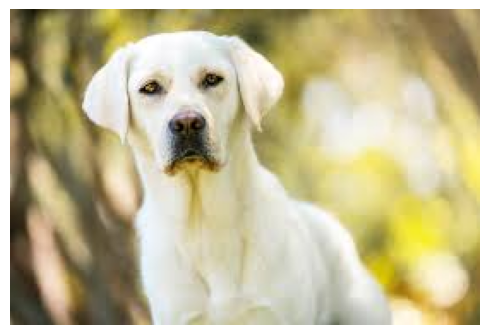

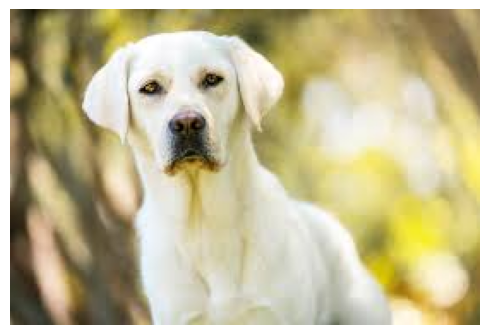

In [7]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSq8prDtL1JHOrK1LDRxlBvbH4qi7A2mcAcCQ&s"
file_path = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(file_path)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)

visualization.plot_image_gallery(
    batch,
    value_range = (0, 255),
    rows = 1,
    cols=1,
    scale= 5,
)

In [9]:
inference_resizing = keras_cv.layers.Resizing(
    640,
    640,
    pad_to_aspect_ratio = True,
    bounding_box_format = "xywh"
)

In [12]:
image_batch = inference_resizing(batch)

In [13]:
label_names = [
    'aeroplane',
    'bicycle',
    'bird',
    'boat',
    'bottle',
    'bus',
    'car',
    'cat',
    'chair',
    'cow',
    'diningtable',
    'dog',
    'horse',
    'motorbike',
    'person',
    'pottedplant',
    'sheep',
    'sofa',
    'train',
    'tvmonitor',
    'total'
]

id2label = {k: v for k, v in enumerate(label_names)}

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


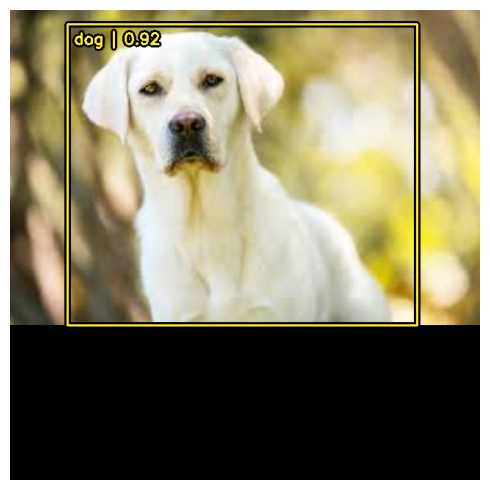

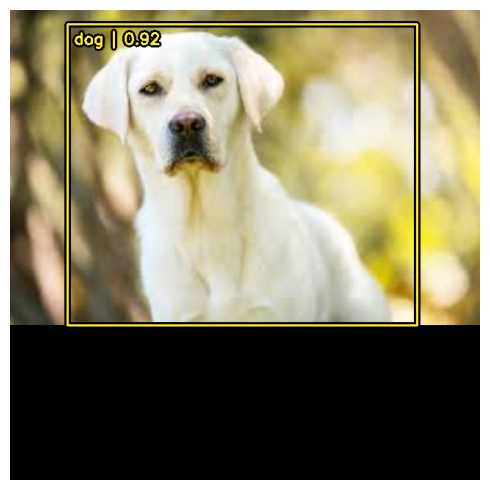

In [14]:
y_pred = pretrained_model.predict(image_batch)

visualization.plot_bounding_box_gallery(
    image_batch,
    value_range = (0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format = "xywh",
    class_mapping = id2label
)

**Non-Max Suppression**

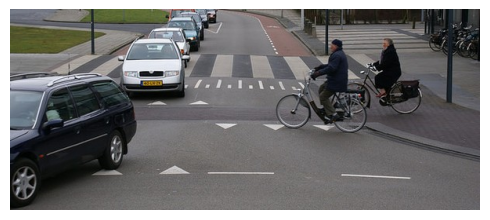

In [41]:
url = "https://archive.org/download/street_202380/street.jpeg"
file_path = tf.keras.utils.get_file(origin=url)
image = keras.utils.load_img(file_path)
image = np.array(image)
h, w, c = image.shape
batch = image.reshape(1, h, w, c)

visualization.plot_image_gallery(
    batch,
    value_range = (0, 255),
    rows = 1,
    cols=1,
    scale= 5,
)
image_batch = inference_resizing(batch)

In [42]:
print(image_batch.shape)

(1, 640, 640, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


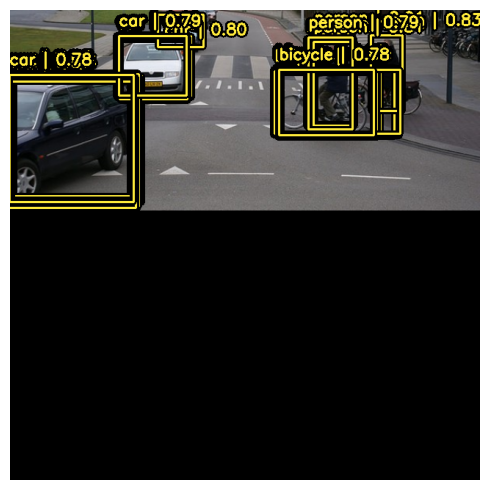

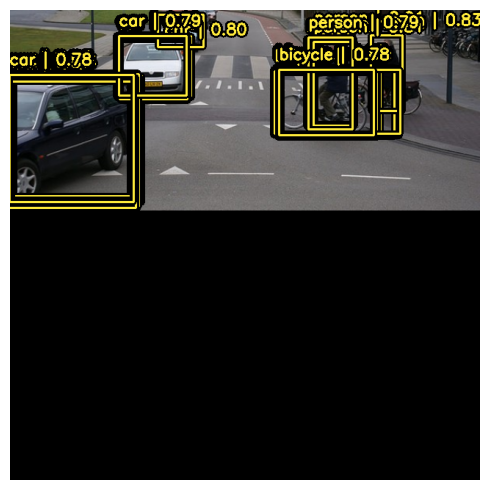

In [44]:
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits = True,
    iou_threshold = 1.0,
    confidence_threshold=0.0
)

pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc",
    bounding_box_format = "xywh",
    prediction_decoder = prediction_decoder
)
y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range = (0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format = "xywh",
    class_mapping = id2label
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


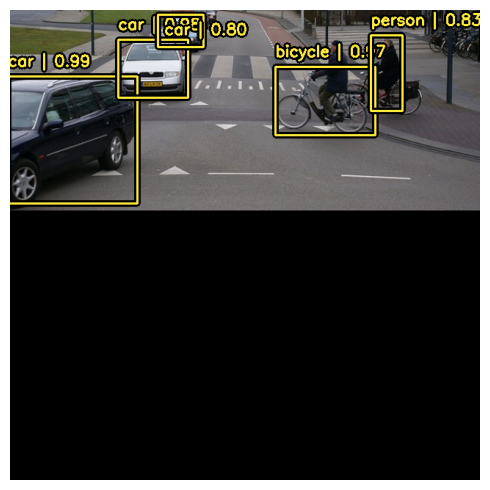

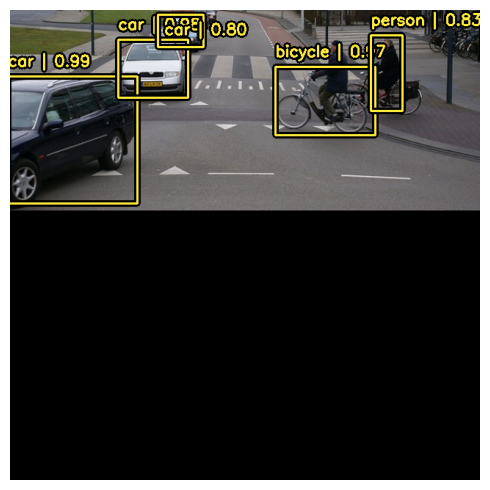

In [46]:
#Try again!!
prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xywh",
    from_logits = True,
    iou_threshold = 0.2,
    confidence_threshold=0.7
)

pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc",
    bounding_box_format = "xywh",
    prediction_decoder = prediction_decoder
)
y_pred = pretrained_model.predict(image_batch)
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range = (0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format = "xywh",
    class_mapping = id2label
)